In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('flights_info.csv')

# Convert inbound and outbound price to numeric values
for column in df.columns[2:4]:
    df[column] = (df[column]
                  .str.split()
                  .apply(lambda x: x[1])
                  .pipe(lambda df: df.str.replace(",", ""))
                  .pipe(lambda df: pd.to_numeric(df))
                  )
df = df.astype(
    {'inbound_date': 'datetime64[ns]', 'outbound_date': 'datetime64[ns]'})

# Calculate total cost
df['total_price'] = df['outbound_price']+df['inbound_price']
df['travel_span'] = df['inbound_date']-df['outbound_date']

In [62]:
df.sort_values(by='total_price')

,outbound_date,inbound_date,outbound_price,inbound_price,total_price,travel_span
415,2024-11-14,2024-11-28,475.89,360.1,835.99,14 days
57,2025-03-07,2025-03-22,461.89,394.1,855.99,15 days
55,2025-03-05,2025-03-20,461.89,394.1,855.99,15 days
59,2025-03-09,2025-03-24,461.89,394.1,855.99,15 days
235,2025-03-07,2025-03-20,461.89,394.1,855.99,13 days
...,...,...,...,...,...,...
447,2024-12-21,2025-01-04,1335.89,1723.1,3058.99,14 days
874,2024-12-21,2025-01-05,1335.89,1723.3,3059.19,15 days
446,2024-12-20,2025-01-03,1321.89,1749.1,3070.99,14 days
624,2024-12-21,2025-01-03,1335.89,1749.2,3085.09,13 days


In [63]:
# Cumple
df[(df['outbound_date'] < pd.to_datetime('2025-2-28')) & (df['inbound_date']
                                                          > pd.to_datetime('2025-2-28'))].sort_values(by='total_price')

,outbound_date,inbound_date,outbound_price,inbound_price,total_price,travel_span
1161,2025-02-09,2025-03-03,461.89,404.5,866.39,22 days
42,2025-02-18,2025-03-05,475.89,394.1,869.99,15 days
220,2025-02-18,2025-03-03,475.89,404.0,879.89,13 days
1168,2025-02-18,2025-03-12,475.89,404.5,880.39,22 days
1603,2025-02-11,2025-03-03,475.89,404.5,880.39,20 days
...,...,...,...,...,...,...
497,2025-02-18,2025-03-04,697.89,744.1,1441.99,14 days
503,2025-02-25,2025-03-11,697.89,744.1,1441.99,14 days
1008,2025-02-15,2025-03-04,697.89,744.5,1442.39,17 days
221,2025-02-19,2025-03-04,750.89,744.1,1494.99,13 days


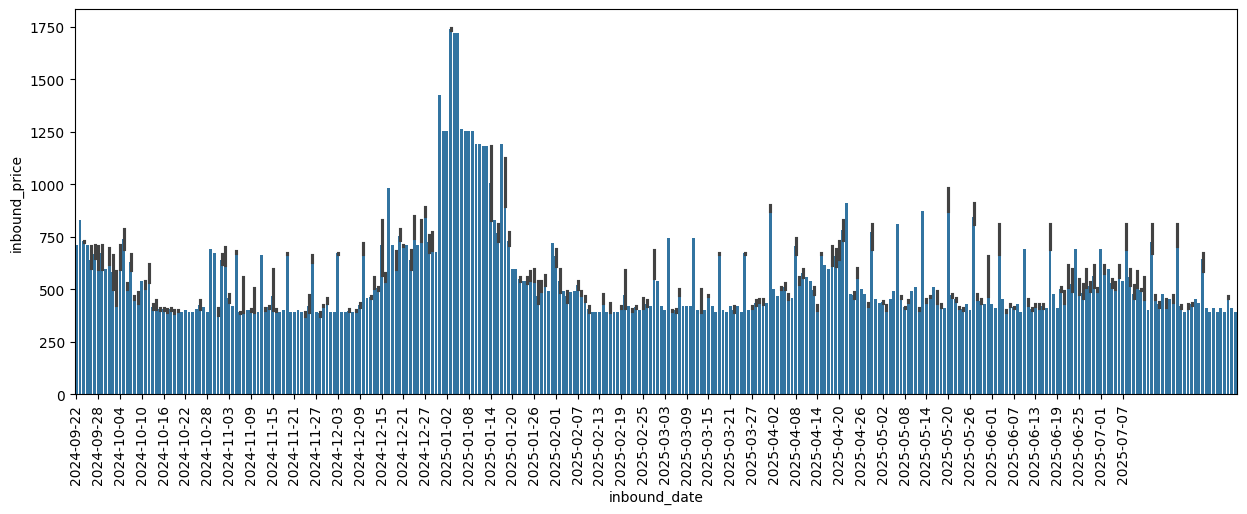

In [64]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=df.sort_values(by='inbound_date'),
                 x='inbound_date', y='inbound_price',)
plt.xticks(range(0, len(df['outbound_date'].unique())+10, 6), rotation=90)
plt.show()

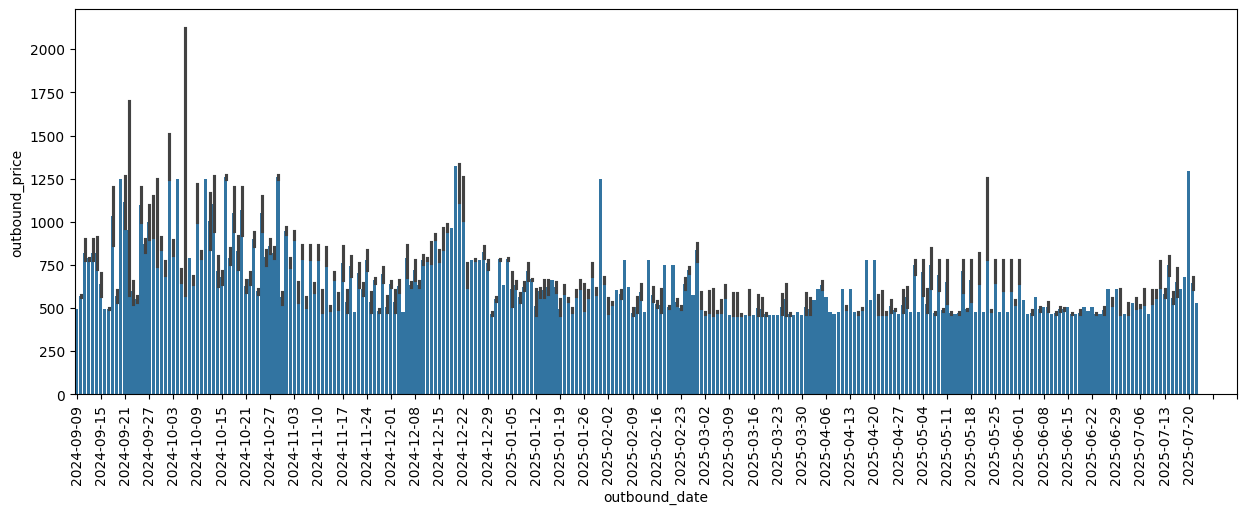

In [65]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=df.sort_values(by='outbound_date'),
                 x='outbound_date', y='outbound_price',)
plt.xticks(range(0, len(df['outbound_date'].unique())+10, 6), rotation=90)
plt.show()

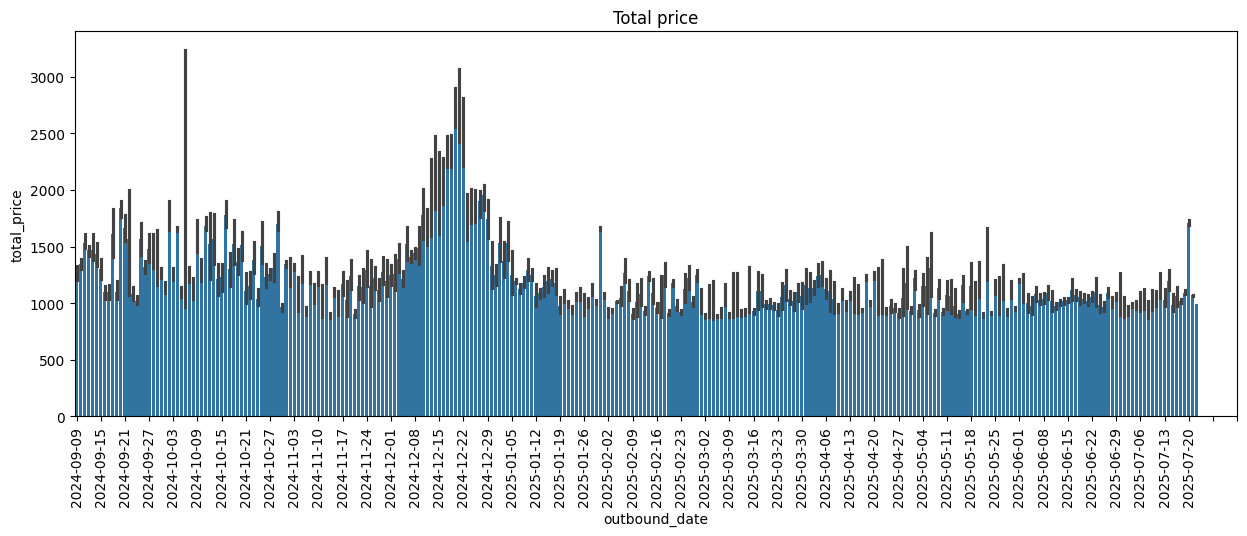

In [66]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=df.sort_values(by='outbound_date'),
                 x='outbound_date', y='total_price')
plt.xticks(range(0, len(df['outbound_date'].unique())+10, 6), rotation=90)
plt.title('Total price')
plt.show()